<a href="https://colab.research.google.com/github/jomariy241/assignment/blob/main/Unsupervised_Learning_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
df=pd.read_csv('/content/force2020_data.csv')
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [30]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [31]:
df.isnull().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [32]:
df.isna().sum()/len(df)*100

,0
RHOB,0.000000
GR,0.000000
DEPTH_MD,0.000000
NPHI,23.196497
PEF,10.016420
DTC,0.443350


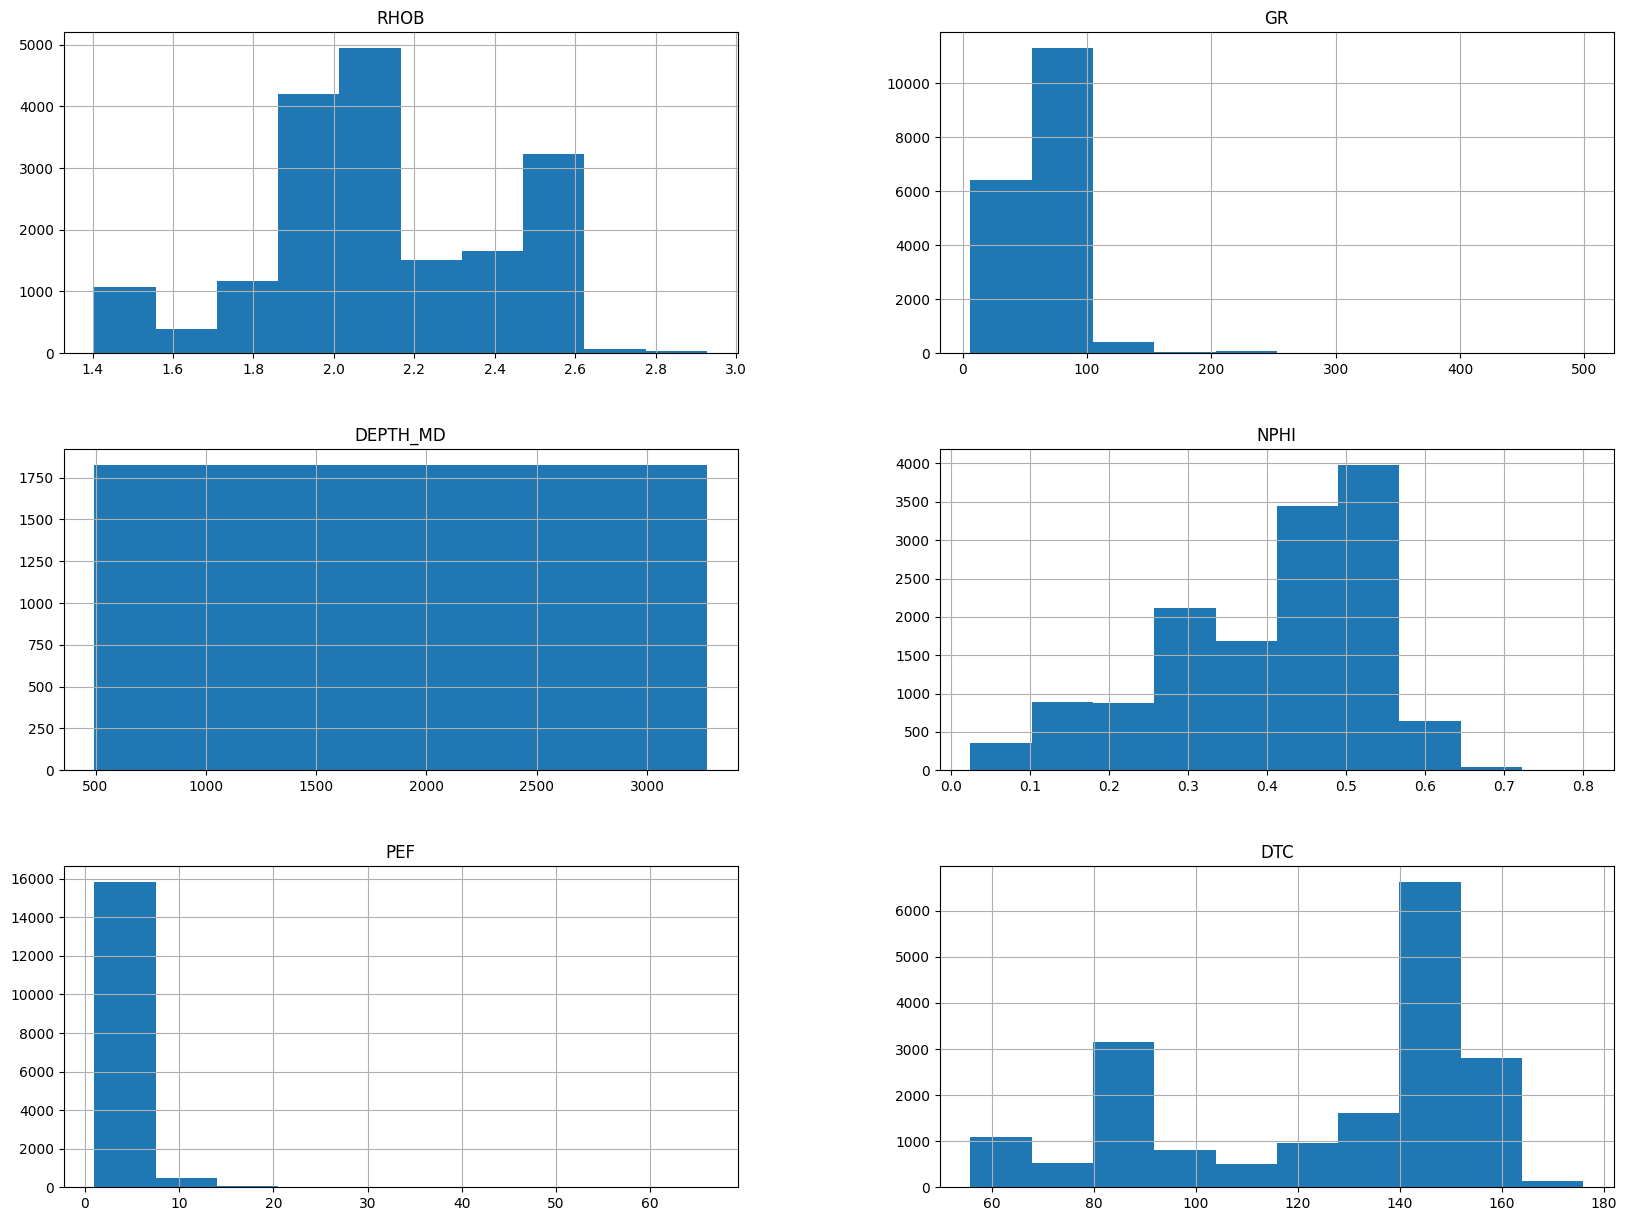

In [33]:
graph=df.select_dtypes(include=['float'])
graph.hist(figsize=(20,15))
plt.show()

In [34]:
# Fill missing values with the median of the column
for i in ['NPHI','PEF','DTC']:
    df[i].fillna(df[i].median(), inplace=True)

In [35]:
df.isnull().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0


In [36]:
df.shape

(18270, 6)

In [37]:
df.columns

Index(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'], dtype='object')

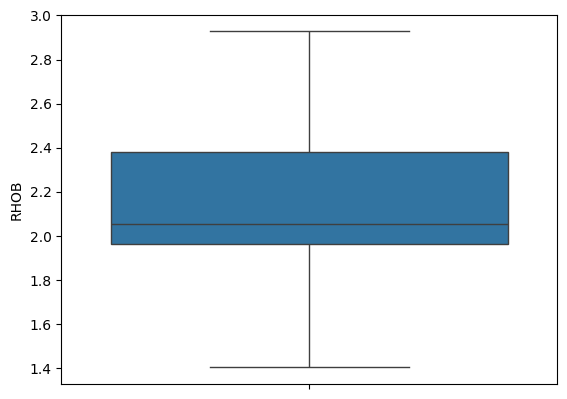

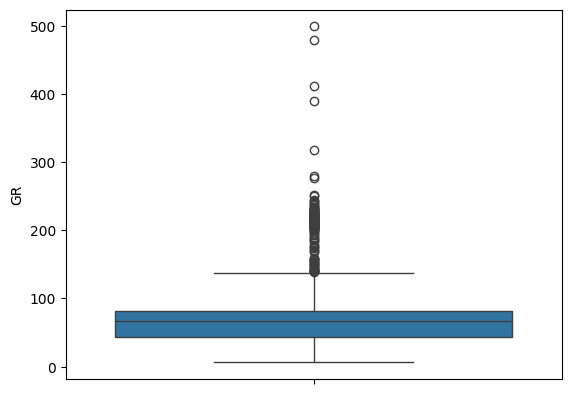

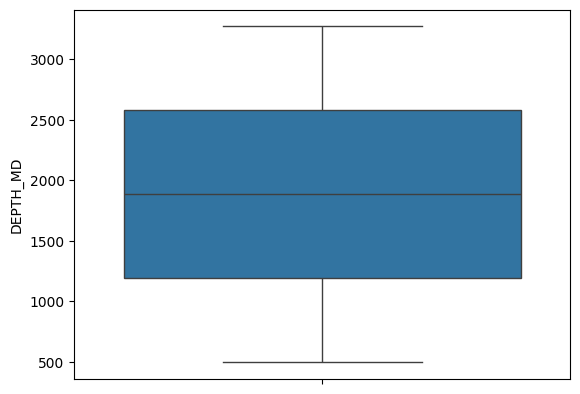

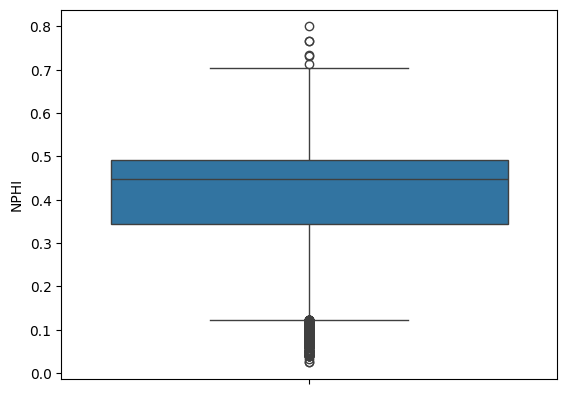

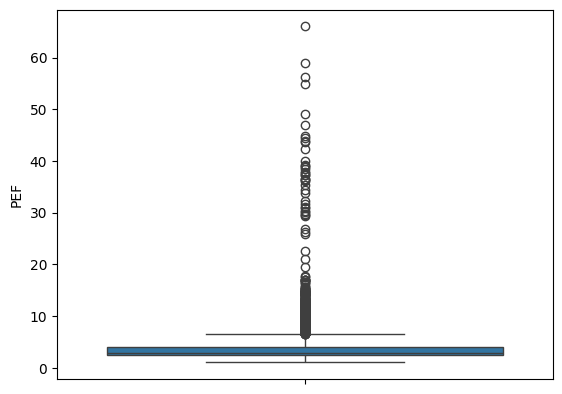

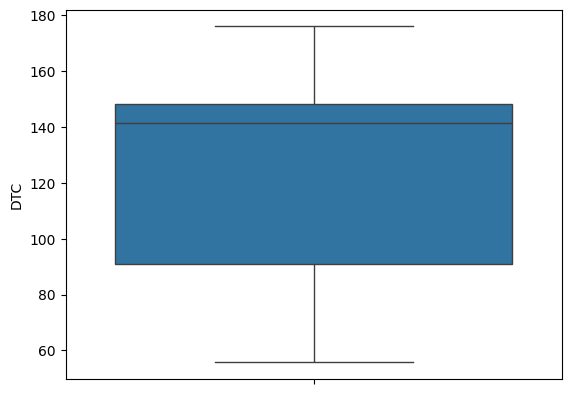

In [38]:
#outlier handling
for i in ['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']:
  sns.boxplot(df[i])
  plt.show()

In [39]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [40]:
columns_scale=['RHOB','NPHI']
df[columns_scale]=sc.fit_transform(df[columns_scale])

In [41]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-0.759999,80.200851,494.528,0.285088,20.915468,161.131180
1,-0.741163,79.262886,494.680,0.285088,19.383013,160.603470
2,-0.718560,74.821999,494.832,0.285088,22.591518,160.173615
3,-0.734045,72.878922,494.984,0.285088,32.191910,160.149429
4,-0.773944,71.729141,495.136,0.285088,38.495632,160.128342


In [75]:
#creating model
x=df[['RHOB','NPHI']]
x.head()

,RHOB,NPHI
0,-0.759999,0.285088
1,-0.741163,0.285088
2,-0.718560,0.285088
3,-0.734045,0.285088
4,-0.773944,0.285088


In [76]:
from sklearn.cluster import KMeans

In [78]:
#specifing the cluster with wcss
#k-mean cluster
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_
  wcss.append(css)

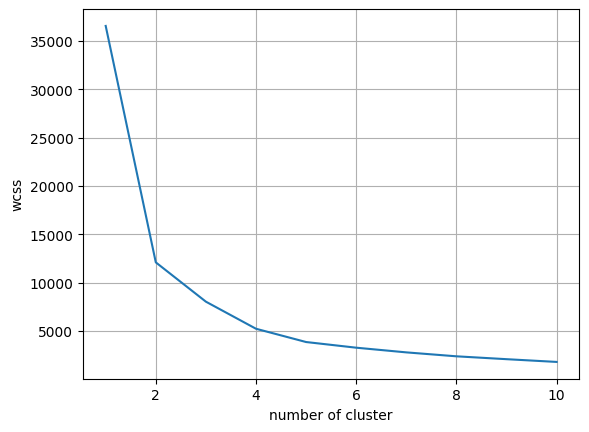

In [79]:
plt.plot(range(1,11),wcss)
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.grid()


In [89]:
km=KMeans(n_clusters=4,n_init=10)
km.fit(x)


KMeans(n_clusters=4, n_init=10)

In [90]:
cluster_labele=km.predict(x)

In [91]:
pd.Series(cluster_labele)
df['cluster']=cluster_labele

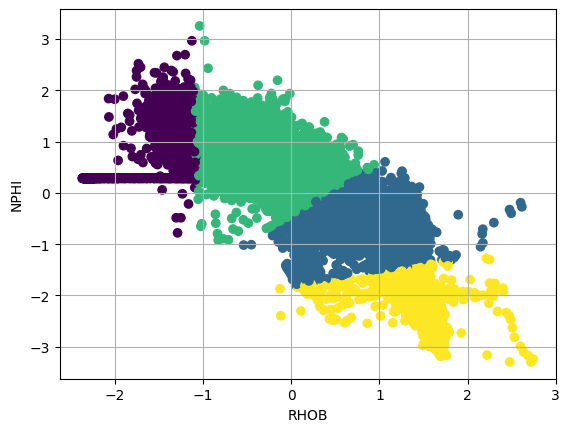

In [92]:
plt.scatter(x['RHOB'], x['NPHI'], c=cluster_labele)
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.grid()

In [84]:
df['cluster_labele']=cluster_labele

In [85]:
cluster_indices=[np.where(cluster_labele==i)[0] ]

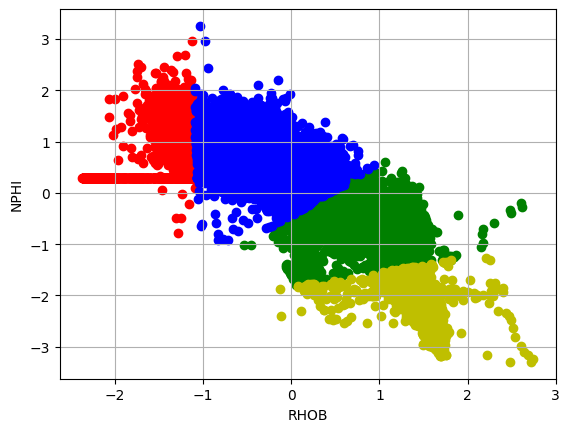

In [93]:
colour=['r','g','b','y']

for i in range(max(cluster_labele+1)):
  cluster_data = x[cluster_labele==i]
  plt.scatter(cluster_data['RHOB'],
              cluster_data['NPHI'],
              c=colour[i],
              label=f'cluster {i}')
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.grid()

In [106]:
#prediction
def predict_cluster(RHOB,NPHI):
  new_data=[[RHOB, NPHI]]
  cluster=km.predict(new_data)
  return cluster[0]

In [108]:
# new data
new_rhob=-0.75
new_nphi=0.28
c = predict_cluster(new_rhob, new_nphi)
print(f'The new data belongs to cluster{c}')

The new data belongs to cluster2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [99]:
#agglomerative hc
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [100]:
mergings=linkage(x,method='ward')

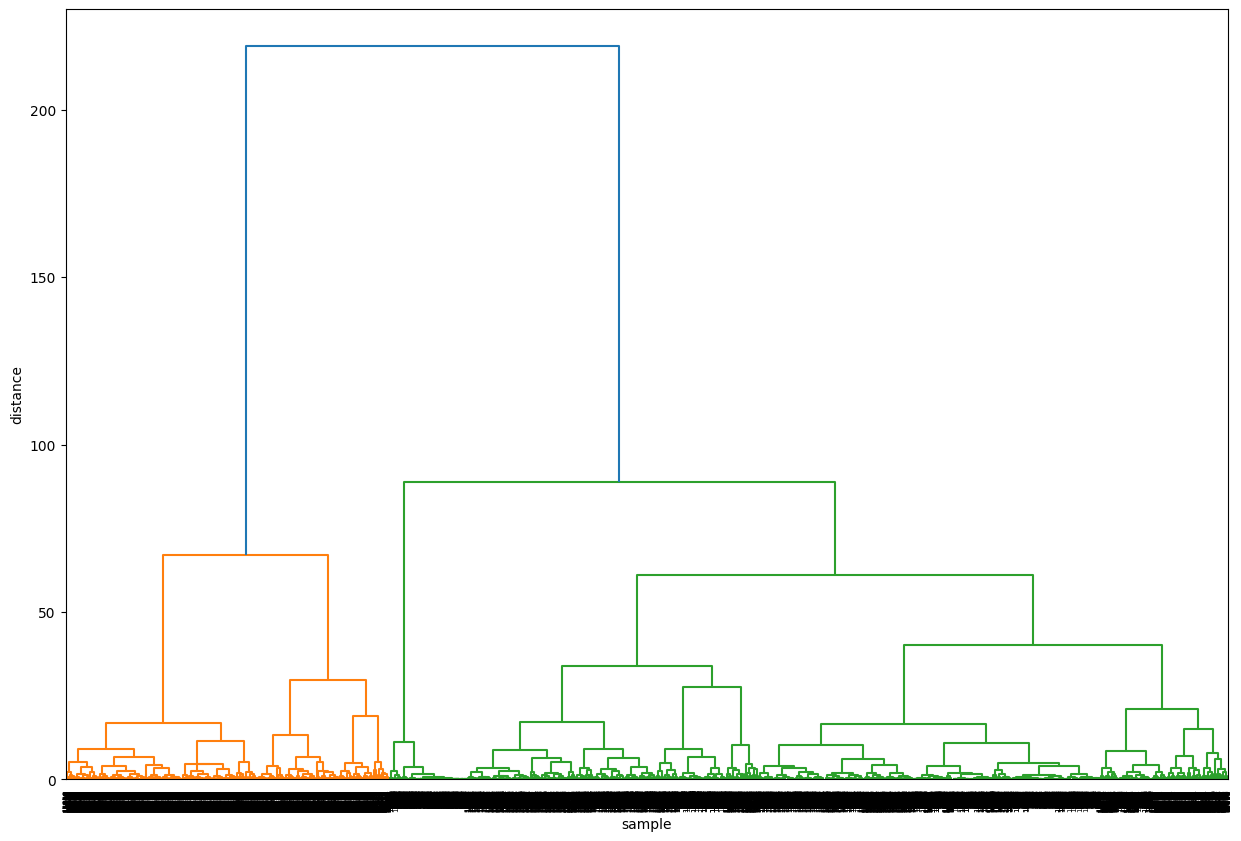

In [109]:
plt.figure(figsize=(15,10))
dendrogram(mergings)
plt.xlabel('sample')
plt.ylabel('distance')
plt.show()

In [125]:
cluster_labels = fcluster(mergings, t=150, criterion='distance')

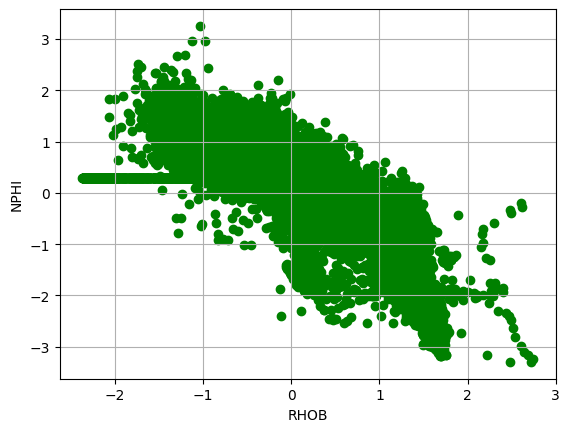

In [126]:
colour=['r','g','b','y']

for i in range(max(cluster_labele+1)):
  cluster_data = x[cluster_labele==i]
  plt.scatter(cluster_data['RHOB'],
              cluster_data['NPHI'],
              c=colour[i],
              label=f'cluster {i}')
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.grid()